In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [27]:
# Simulando uma base de clientes
np.random.seed(42)
num_samples = 5000

df = pd.DataFrame({
    'idade': np.random.randint(18, 65, num_samples),
    'renda': np.random.randint(2000, 20000, num_samples),
    'frequencia_visitas': np.random.randint(1, 30, num_samples),
    'valor_medio_compra': np.random.randint(50, 500, num_samples),
    'respondeu_email': np.random.randint(0, 2, num_samples),  # 0 = não, 1 = sim
    'clicou_anuncio': np.random.randint(0, 2, num_samples),  # 0 = não, 1 = sim
    'comprou': np.random.randint(0, 2, num_samples)  # 0 = não, 1 = sim (alvo)
})

# Visualizando os dados
df.head()


,idade,renda,frequencia_visitas,valor_medio_compra,respondeu_email,clicou_anuncio,comprou
0,56,12776,22,369,1,1,1
1,46,2067,4,67,0,0,0
2,32,11788,25,394,0,1,1
3,60,7660,20,468,0,1,1
4,25,6478,6,245,1,0,1


In [28]:
# Separar os dados em X (features) e y (alvo)
X = df.drop(columns=['comprou'])
y = df['comprou']

# Separação em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")


Tamanho do conjunto de treino: (4000, 6)
Tamanho do conjunto de teste: (1000, 6)


In [29]:
# Criar e treinar o modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Fazer previsões
y_pred = rf.predict(X_test)


Acurácia do modelo: 0.52


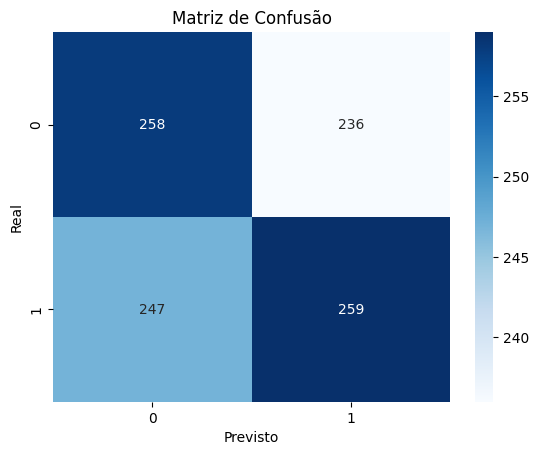

              precision    recall  f1-score   support

           0       0.51      0.52      0.52       494
           1       0.52      0.51      0.52       506

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.52      0.52      0.52      1000



In [30]:
# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

# Exibir matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# Exibir relatório de classificação
print(classification_report(y_test, y_pred))


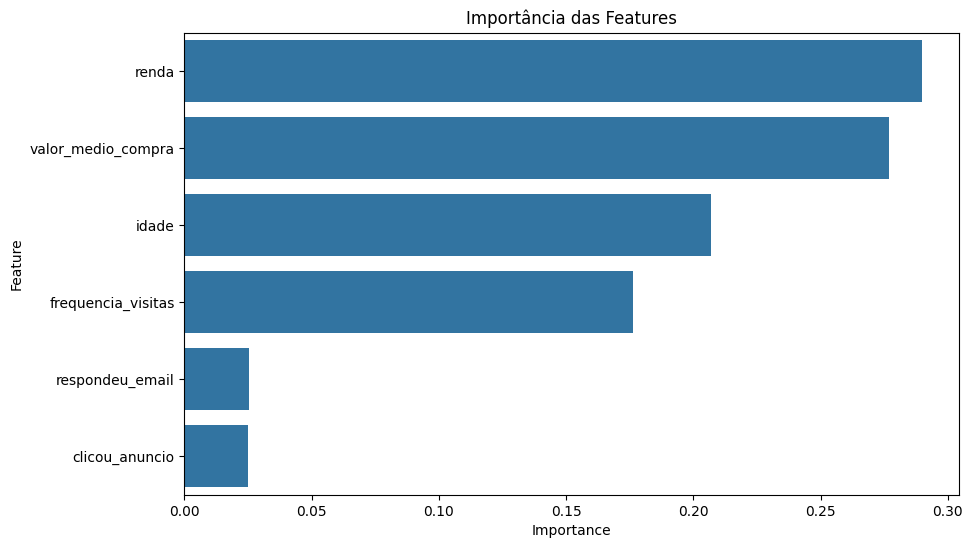

In [31]:
# Obter importância das features
importances = rf.feature_importances_
feature_names = X.columns

# Criar DataFrame com as importâncias
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibir gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title("Importância das Features")
plt.show()


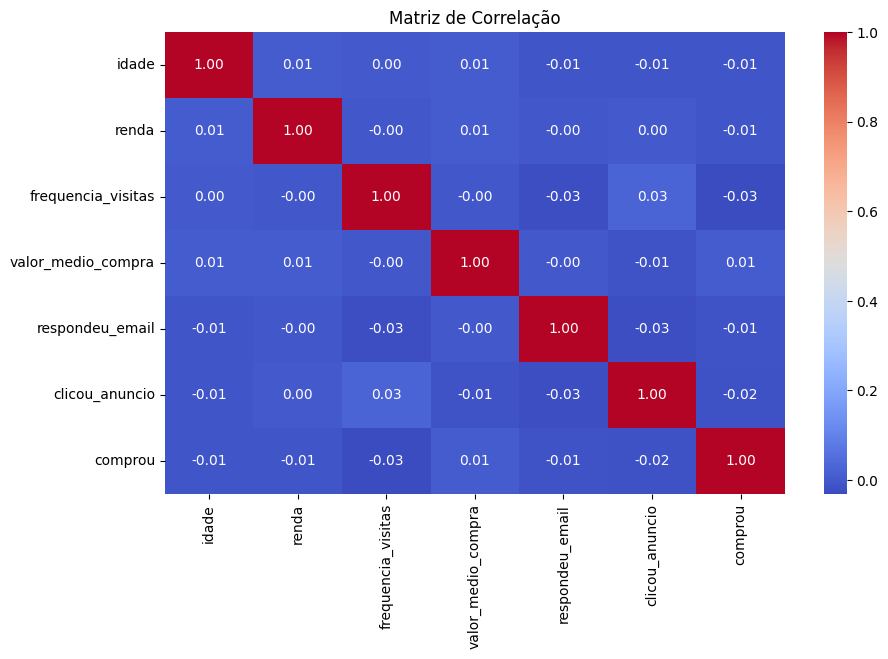

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar matriz de correlação
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


In [33]:
from sklearn.ensemble import RandomForestClassifier

# Ajustando hiperparâmetros
rf_tuned = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
rf_tuned.fit(X_train, y_train)

# Fazer previsões
y_pred_tuned = rf_tuned.predict(X_test)

# Avaliar novo modelo
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Nova Acurácia do modelo: {accuracy_tuned:.2f}")


Nova Acurácia do modelo: 0.51


In [34]:
# Install xgboost package
%pip install xgboost

from xgboost import XGBClassifier

# Criar modelo XGBoost
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# Fazer previsões
y_pred_xgb = xgb.predict(X_test)

# Avaliar modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Acurácia do XGBoost: {accuracy_xgb:.2f}")


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: xgboost in c:\users\paulo\appdata\local\programs\python\python39\lib\site-packages (2.1.3)

Acurácia do XGBoost: 0.52



[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
# Obter probabilidades das previsões (probabilidade de ser classe 1 = comprar)
probabilidades = rf.predict_proba(X_test)[:, 1]

# Criar um DataFrame para visualizar os resultados
resultados = X_test.copy()
resultados["probabilidade_compra"] = probabilidades
resultados["previsto"] = rf.predict(X_test)  # 0 ou 1
resultados["real"] = y_test.values  # Valor real de compra

# Ordenar clientes por maior probabilidade de compra
resultados = resultados.sort_values(by="probabilidade_compra", ascending=False)




In [36]:
display(resultados)


,idade,renda,frequencia_visitas,valor_medio_compra,respondeu_email,clicou_anuncio,probabilidade_compra,previsto,real
2284,35,15731,1,111,1,1,0.85,1,1
4802,57,17082,14,300,0,0,0.79,1,1
3857,21,13367,15,394,1,0,0.79,1,1
378,43,11878,19,166,1,0,0.79,1,0
468,43,7184,5,485,1,1,0.78,1,0
...,...,...,...,...,...,...,...,...,...
3288,34,10817,13,71,1,1,0.20,0,0
149,21,13088,28,85,0,0,0.20,0,0
393,40,18968,11,447,1,0,0.18,0,0
4334,51,2037,21,462,1,0,0.17,0,1


In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Normalizar os dados antes do PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reduzir para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criar um DataFrame com os novos componentes
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Exibir os primeiros registros
display(df_pca.head())


,PC1,PC2
0,0.412365,0.820603
1,-0.572768,-1.123047
2,1.624965,0.304837
3,1.241140,1.430144
4,-1.789342,-1.413810


In [38]:
# Variância explicada por cada componente
variancia_explicada = pca.explained_variance_ratio_
print(f"Variância explicada pelos componentes principais: {variancia_explicada}")
print(f"Variância total explicada: {sum(variancia_explicada) * 100:.2f}%")


Variância explicada pelos componentes principais: [0.17583995 0.16970092]
Variância total explicada: 34.55%


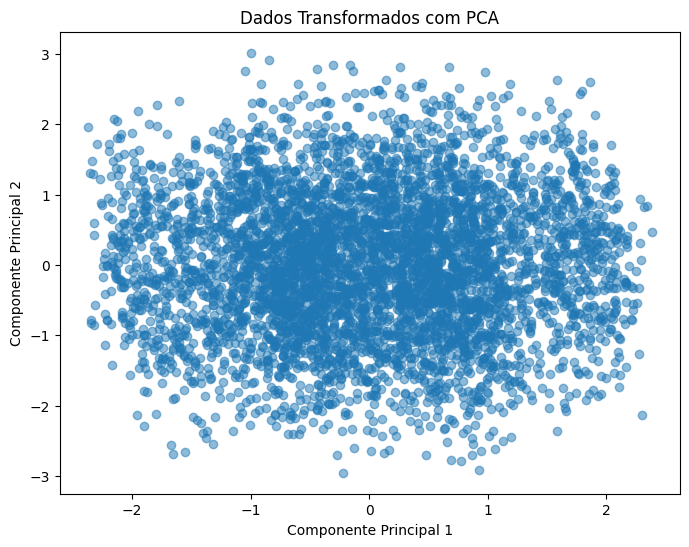

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.5)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Dados Transformados com PCA")
plt.show()


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separar os dados em treino e teste usando os componentes principais
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca, y_train)

# Fazer previsões e avaliar
y_pred_pca = rf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Acurácia do modelo com PCA: {accuracy_pca:.2f}")


Acurácia do modelo com PCA: 0.52


In [41]:
# Treinar modelo original sem PCA para comparação
rf_original = RandomForestClassifier(n_estimators=100, random_state=42)
rf_original.fit(X_train, y_train)

# Fazer previsões
y_pred_original = rf_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

print(f"Acurácia do modelo original: {accuracy_original:.2f}")
print(f"Acurácia do modelo com PCA: {accuracy_pca:.2f}")


Acurácia do modelo original: 0.52
Acurácia do modelo com PCA: 0.52


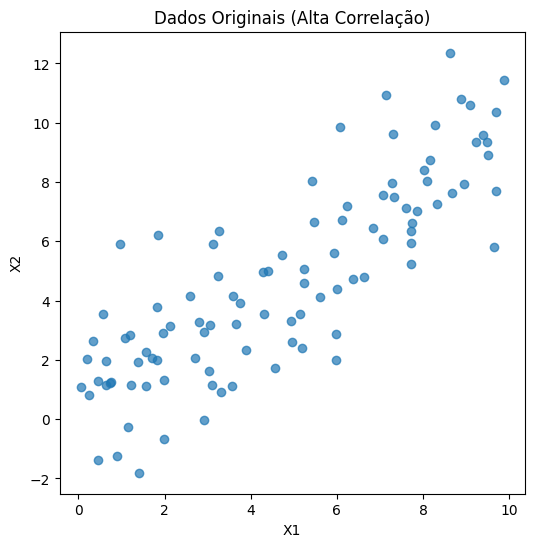

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Gerar dados artificiais
np.random.seed(42)
x1 = np.random.rand(100) * 10  # Variável 1
x2 = x1 + np.random.randn(100) * 2  # Variável 2 (fortemente correlacionada com x1)

# Criar DataFrame
df = pd.DataFrame({"X1": x1, "X2": x2})

# Visualizar os dados
plt.figure(figsize=(6,6))
plt.scatter(df["X1"], df["X2"], alpha=0.7)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Dados Originais (Alta Correlação)")
plt.show()


In [43]:
# Normalizar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Aplicar PCA (reduzindo para 1 componente)
pca = PCA(n_components=1)
df_pca = pca.fit_transform(df_scaled)

# Exibir os primeiros valores transformados
print("Dados Originais:")
print(df.head())

print("\nDados Após PCA:")
print(df_pca[:5])


Dados Originais:
         X1        X2
0  3.745401  3.919495
1  9.507143  8.909128
2  7.319939  7.503461
3  5.986585  2.011447
4  1.560186  1.120843

Dados Após PCA:
[[-0.3991197 ]
 [ 2.06869398]
 [ 1.23872946]
 [-0.28107917]
 [-1.53330106]]


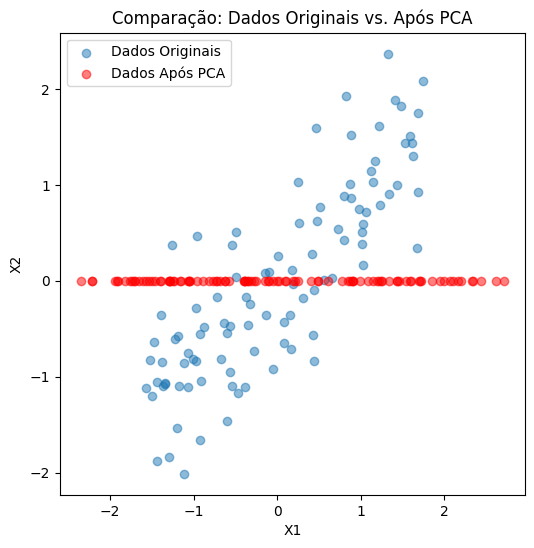

In [44]:
plt.figure(figsize=(6,6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], alpha=0.5, label="Dados Originais")
plt.scatter(df_pca, [0]*len(df_pca), alpha=0.5, label="Dados Após PCA", color="red")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Comparação: Dados Originais vs. Após PCA")
plt.show()


In [45]:
print(f"Variância explicada pelo primeiro componente: {pca.explained_variance_ratio_[0]*100:.2f}%")


Variância explicada pelo primeiro componente: 91.57%
